<a href="https://colab.research.google.com/github/HugoMagos0725/Analisis_de_datos/blob/main/Tarea_4_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FCFM-BUAP, 2023**

## Proyecto: Redes Neuronales
Nombre: Hugo Cuautle Magos

Matricula: 201847053

Materia: Análisis de datos

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import sklearn
import math
import cv2
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

## Problema 1

Entrena una red neuronal para que reproduzca las siguientes funciones en el intervalo $[-1,1]$. Graficar la solución de la red en conjunto con la gráfica de la función. 

1.  $3 sin(\pi x)$
2.  $1+2x+4x^3$

In [2]:
def seno(x): 
  return 3.0*np.sin(np.pi*x)

def poli(x):
  return 1.0 + 2.0*x + 4.0*x*x*x

x=np.linspace(-1,1,100)
y_sen=seno(x)
y_poli=poli(x)

In [3]:
model_s=Sequential()
model_s.add(Dense(800,activation='sigmoid',input_shape=(1,)))
model_s.add(Dense(300,activation='elu',input_shape=(1,)))
model_s.add(Dense(1,activation='linear'))

model_p=Sequential()
model_p.add(Dense(800,activation='sigmoid',input_shape=(1,)))
model_p.add(Dense(300,activation='elu',input_shape=(1,)))
model_p.add(Dense(1,activation='linear'))

In [4]:
model_s.compile(optimizer='RMSprop',
              loss = 'mean_squared_error')

historial=model_s.fit(x, y_sen,epochs=1000,verbose=False)

In [5]:
model_p.compile(optimizer='RMSprop',
              loss = 'mean_squared_error')

historial=model_p.fit(x, y_poli,epochs=1000,verbose=False)

In [6]:
y_pred_sen=model_s.predict([x])
y_pred_poli=model_p.predict([x])

4/4 [==============================] - 0s 3ms/step


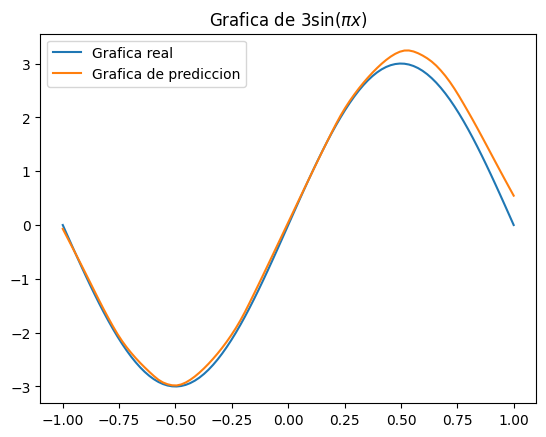

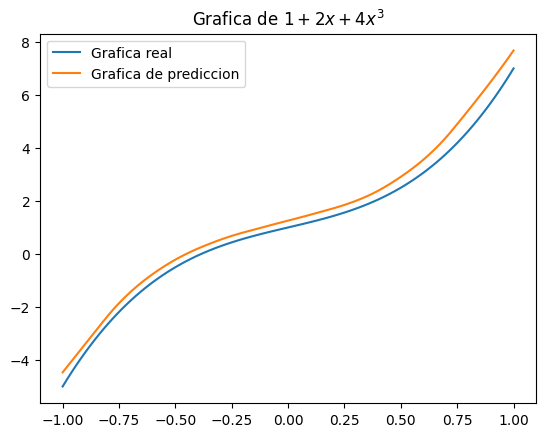

In [7]:
plt.title(r'Grafica de $3\sin(\pi x)$')
plt.plot(x,y_sen)
plt.plot(x,y_pred_sen)
plt.legend(['Grafica real','Grafica de prediccion'])

plt.show()
plt.title(r'Grafica de $1+2x+4x^3$')
plt.plot(x,y_poli)
plt.plot(x,y_pred_poli)
plt.legend(['Grafica real','Grafica de prediccion'])

## Problema 2

Elegir un problema de los siguientes: 

- Detectar fraudes en movimientos de tarjetas bancarias. https://www.kaggle.com/mlg-ulb/creditcardfraud

- Identificar enfermedades en plantas. 

y diseñar y entrenar una red neuronal con keras

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c plant-pathology-2021-fgvc8 --force

100% 14.9G/14.9G [02:23<00:00, 114MB/s]
100% 14.9G/14.9G [02:23<00:00, 111MB/s]


In [ ]:
!mkdir plant
!unzip plant-pathology-2021-fgvc8.zip -d plant

!rm plant-pathology-2021-fgvc8.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: plant/train_images/e00c97b2de4749ce.jpg  
  inflating: plant/train_images/e00df890cfe62736.jpg  
  inflating: plant/train_images/e00ed0bf43a87f25.jpg  
  inflating: plant/train_images/e00f759d65d52887.jpg  
  inflating: plant/train_images/e00f934d9e50ad5b.jpg  
  inflating: plant/train_images/e00fce341cb63da5.jpg  
  inflating: plant/train_images/e010c7c35ecf3d1c.jpg  
  inflating: plant/train_images/e01112939f783fec.jpg  
  inflating: plant/train_images/e01592da4d71b8be.jpg  
  inflating: plant/train_images/e0189acaf8cf80fd.jpg  
  inflating: plant/train_images/e0189e4999bdd0fa.jpg  
  inflating: plant/train_images/e01ae16d4a759cb5.jpg  
  inflating: plant/train_images/e01dc39ccb2b4ccb.jpg  
  inflating: plant/train_images/e01e42d90c66f3f3.jpg  
  inflating: plant/train_images/e01e870bec65f40f.jpg  
  inflating: plant/train_images/e01f17e0187fb80f.jpg  
  inflating: plant/train_images/e01f503cb752e6c5.jpg 

In [ ]:
l='/content/plant/train.csv'
df=pd.read_csv(l)

In [ ]:
len(df['labels'])

18632

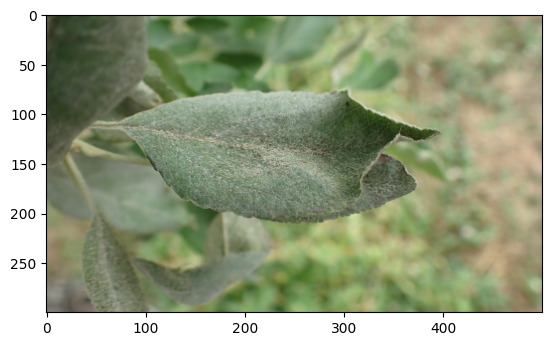

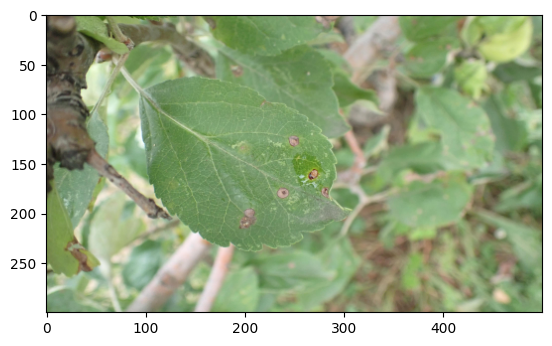

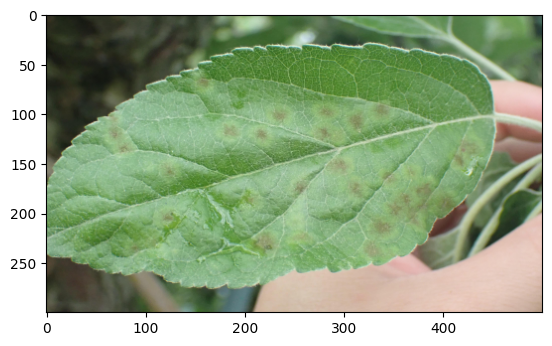

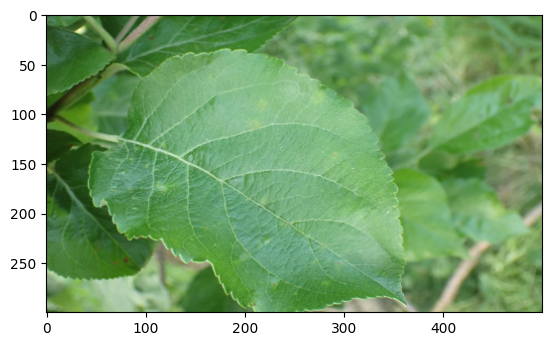

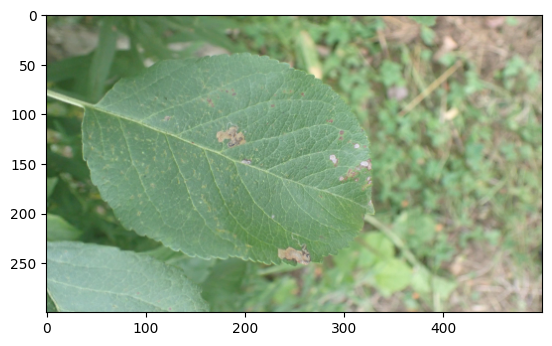

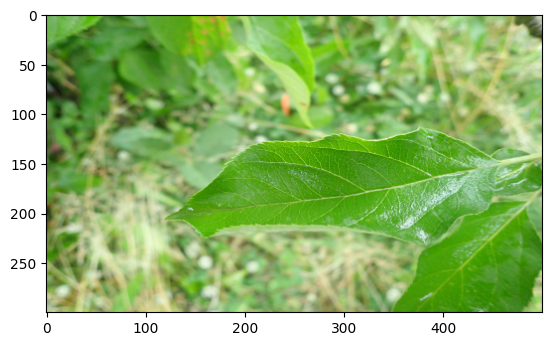

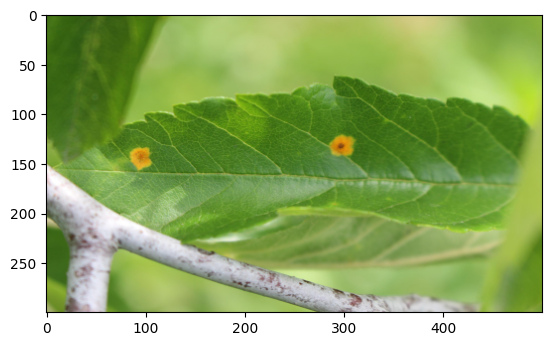

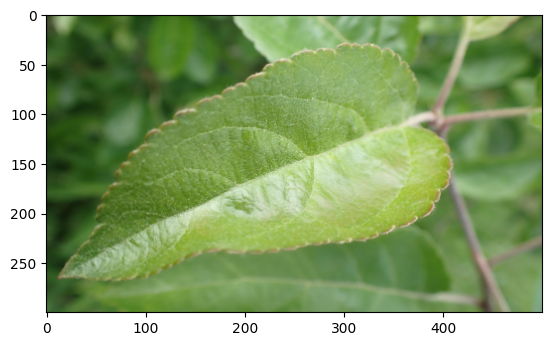

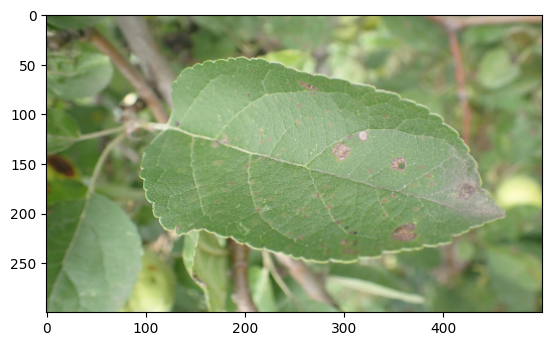

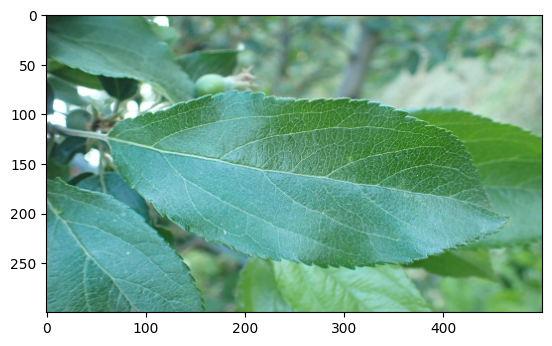

In [ ]:

for i in range(10):
  imageToMatrice=imread('/content/plant/train_images/'+df['image'][i])
  imageToMatrice=cv2.resize((imageToMatrice),(500,300),interpolation=cv2.INTER_AREA)
  imageToMatrice=cv2.cvtColor(imageToMatrice,cv2.COLOR_RGB2GRAY)
  plt.imshow(imageToMatrice)
  plt.show()

In [ ]:
l='/content/plant/train.csv'
df=pd.read_csv(l)
img=[]
for i in df['image']: 
  # 200,130
  imageToMatrice=imread('/content/plant/train_images/'+i)
  imageToMatrice=cv2.resize((imageToMatrice),(500,300),interpolation=cv2.INTER_AREA)
  imageToMatrice=cv2.cvtColor(imageToMatrice,cv2.COLOR_BGR2GRAY)
  imageToMatrice=imageToMatrice.reshape(500,300,1)
  img.append(imageToMatrice)
  print('{:.2f}'.format((100.0*len(img))/18632),'%')

0.01 %
0.01 %
0.02 %
0.02 %
0.03 %
0.03 %
0.04 %
0.04 %
0.05 %
0.05 %
0.06 %
0.06 %
0.07 %
0.08 %
0.08 %
0.09 %
0.09 %
0.10 %
0.10 %
0.11 %
0.11 %
0.12 %
0.12 %
0.13 %
0.13 %
0.14 %
0.14 %
0.15 %
0.16 %
0.16 %
0.17 %
0.17 %
0.18 %
0.18 %
0.19 %
0.19 %
0.20 %
0.20 %
0.21 %
0.21 %
0.22 %
0.23 %
0.23 %
0.24 %
0.24 %
0.25 %
0.25 %
0.26 %
0.26 %
0.27 %
0.27 %
0.28 %
0.28 %
0.29 %
0.30 %
0.30 %
0.31 %
0.31 %
0.32 %
0.32 %
0.33 %
0.33 %
0.34 %
0.34 %
0.35 %
0.35 %
0.36 %
0.36 %
0.37 %
0.38 %
0.38 %
0.39 %
0.39 %
0.40 %
0.40 %
0.41 %
0.41 %
0.42 %
0.42 %
0.43 %
0.43 %
0.44 %
0.45 %
0.45 %
0.46 %
0.46 %
0.47 %
0.47 %
0.48 %
0.48 %
0.49 %
0.49 %
0.50 %
0.50 %
0.51 %
0.52 %
0.52 %
0.53 %
0.53 %
0.54 %
0.54 %
0.55 %
0.55 %
0.56 %
0.56 %
0.57 %
0.57 %
0.58 %
0.59 %
0.59 %
0.60 %
0.60 %
0.61 %
0.61 %
0.62 %
0.62 %
0.63 %
0.63 %
0.64 %
0.64 %
0.65 %
0.65 %
0.66 %
0.67 %
0.67 %
0.68 %
0.68 %
0.69 %
0.69 %
0.70 %
0.70 %
0.71 %
0.71 %
0.72 %
0.72 %
0.73 %
0.74 %
0.74 %
0.75 %
0.75 %
0.76 %
0.76 %
0.77 %

KeyboardInterrupt: ignored

In [ ]:
enfermedad=[]
for i in df['labels']:
  if i not in enfermedad:
    enfermedad.append(i)

print(enfermedad)

In [ ]:
y=[]
for i in df['labels']:
  x=enfermedad.index(i)
  y.append(x)

y=tf.keras.utils.to_categorical(y,num_classes=12)

print(y)

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(img,y,test_size=0.25,random_state=42)

x_train=np.array(x_train).astype(float)/255
x_test=np.array(x_test).astype(float)/255

In [ ]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

In [ ]:
x_train[0]

In [ ]:
inputs = keras.Input(shape=(500,300,3,1))
x = layers.Conv3D(100,(10,25,3))(inputs)
x = layers.Activation('relu')(x)
x = layers.MaxPooling3D(pool_size=(2,2,1))(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(15,activation='sigmoid')(x)
outputs = layers.Dense(12,activation='sigmoid')(x)
learning_rate=0.001
model = keras.Model(inputs=inputs,outputs=outputs)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate),metrics=['accuracy'])

In [ ]:
x_train.shape

In [ ]:
history = model.fit(x_train, y_train,
                    #batch_size=1000,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test)
                    )